<a href="https://colab.research.google.com/github/chimaOkwuokei/ISEND-PAU/blob/main/EffNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#you'd drop a zipped file containing the data, and it has to be in the format is seen in the next cell
!unzip -q /content/train.zip

In [2]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('train')

In [3]:
print(dataset_path) #this prints the kind of classes in the dataset

['Patches', 'Inclusion', 'Scratches', 'Pitted', 'Crazing', 'Rolled']


In [4]:
print(f'The length of the type of class found are {len(dataset_path)}')

The length of the type of class found are 6


In [5]:
class_labels = []

for item in dataset_path:
  all_classes = os.listdir('train' + '/' + item)

  for room in all_classes:
    class_labels.append((item, str('dataset_path' + '/' + item) + '/' + room))

In [6]:
df = pd.DataFrame(data=class_labels,columns=['Labels','image'])

print(df.head())
print(df.tail())

    Labels                            image
0  Patches   dataset_path/Patches/Pa_72.bmp
1  Patches   dataset_path/Patches/Pa_86.bmp
2  Patches  dataset_path/Patches/Pa_167.bmp
3  Patches  dataset_path/Patches/Pa_256.bmp
4  Patches   dataset_path/Patches/Pa_76.bmp
      Labels                           image
1651  Rolled  dataset_path/Rolled/RS_129.bmp
1652  Rolled  dataset_path/Rolled/RS_225.bmp
1653  Rolled  dataset_path/Rolled/RS_183.bmp
1654  Rolled  dataset_path/Rolled/RS_221.bmp
1655  Rolled  dataset_path/Rolled/RS_125.bmp


In [7]:
print(f'Total number of imges in the dataset: {len(df)}')

Total number of imges in the dataset: 1656


In [8]:
label_count = df['Labels'].value_counts()
print(f'The count of labels is {label_count}')

The count of labels is Labels
Patches      276
Inclusion    276
Scratches    276
Pitted       276
Crazing      276
Rolled       276
Name: count, dtype: int64


In [9]:
#resizing images

import cv2
path = 'train/'
dataset_path = os.listdir('train')

im_size = 260
images = []
labels = []

for i in dataset_path:
  data_path = path + str(i)
  filenames = [i for i in os.listdir(data_path)]

  for f in filenames:
    img = cv2.imread(data_path + '/' + f)
    img = cv2.resize(img, (im_size, im_size))
    images.append(img)
    labels.append(i)

In [10]:
images = np.array(images)
images = images.astype('float32')/255.0 #for normalization
images.shape

(1656, 260, 260, 3)

In [11]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#this is for label encoding
y = df['Labels'].values
print(y)

y_labelencoder = LabelEncoder()
y = y_labelencoder.fit_transform(y)

print(y)
print(np.unique(y))

['Patches' 'Patches' 'Patches' ... 'Rolled' 'Rolled' 'Rolled']
[2 2 2 ... 4 4 4]
[0 1 2 3 4 5]


In [12]:
# #this is for one hot enconding

y=y.reshape(-1,1)

# from sklearn.compose import ColumnTransformer

# ct = ColumnTransformer([('my_ohe', OneHotEncoder(), [0])], remainder='passthrough')
# Y = ct.fit_transform(y)
# print(Y[:5])
# print(Y[35:])


import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Assuming y is already reshaped to (-1, 1)
ct = ColumnTransformer([('my_ohe', OneHotEncoder(), [0])], remainder='passthrough')
Y_sparse = ct.fit_transform(y)

# Convert the sparse matrix to a dense array
Y = Y_sparse.toarray()

# Print the output for verification
print(Y[:5])
print(Y[35:])



[[0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
[[0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]]


In [13]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

images, Y = shuffle(images, Y, random_state=1)

train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.25, random_state=415)

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(1242, 260, 260, 3)
(1242, 6)
(414, 260, 260, 3)
(414, 6)


In [14]:
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB2

NUM_CLASSES = 6
IMG_SIZE = 260
size = (IMG_SIZE, IMG_SIZE)

inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE,3))

#using model without transfer learning, basically not using the pretrained model
outputs = EfficientNetB2(include_top=True, weights=None, classes=NUM_CLASSES)(inputs)



In [16]:
model = tf.keras.Model(inputs, outputs)

model.compile(
    optimizer="adam",
    loss = "categorical_crossentropy",
    metrics=["accuracy"]
    )

model.summary()
                #train images and train labels
hist = model.fit(train_x, train_y,epochs=20,verbose=2)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 260, 260, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb2 (Functional)          │ (None, 6)                   │       7,777,023 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,777,023 (29.67 MB)

 Trainable params: 7,709,448 (29.41 MB)

 Non-trainable params: 67,575 (263.97 KB)

Epoch 1/20
39/39 - 197s - 5s/step - accuracy: 0.4388 - loss: 2.8761
Epoch 2/20
39/39 - 10s - 250ms/step - accuracy: 0.6683 - loss: 1.2844
Epoch 3/20
39/39 - 10s - 254ms/step - accuracy: 0.7818 - loss: 0.8425
Epoch 4/20
39/39 - 10s - 258ms/step - accuracy: 0.8349 - loss: 0.5389
Epoch 5/20
39/39 - 10s - 261ms/step - accuracy: 0.8881 - loss: 0.3282
Epoch 6/20
39/39 - 10s - 261ms/step - accuracy: 0.9058 - loss: 0.3259
Epoch 7/20
39/39 - 10s - 258ms/step - accuracy: 0.9114 - loss: 0.3064
Epoch 8/20
39/39 - 10s - 255ms/step - accuracy: 0.9275 - loss: 0.2182
Epoch 9/20
39/39 - 10s - 254ms/step - accuracy: 0.9404 - loss: 0.2031
Epoch 10/20
39/39 - 10s - 256ms/step - accuracy: 0.9203 - loss: 0.2656
Epoch 11/20
39/39 - 10s - 255ms/step - accuracy: 0.9364 - loss: 0.2363
Epoch 12/20
39/39 - 10s - 256ms/step - accuracy: 0.9469 - loss: 0.1725
Epoch 13/20
39/39 - 10s - 256ms/step - accuracy: 0.9340 - loss: 0.1971
Epoch 14/20
39/39 - 10s - 257ms/step - accuracy: 0.9525 - loss: 0.1676
Epoch 15/20
39/39

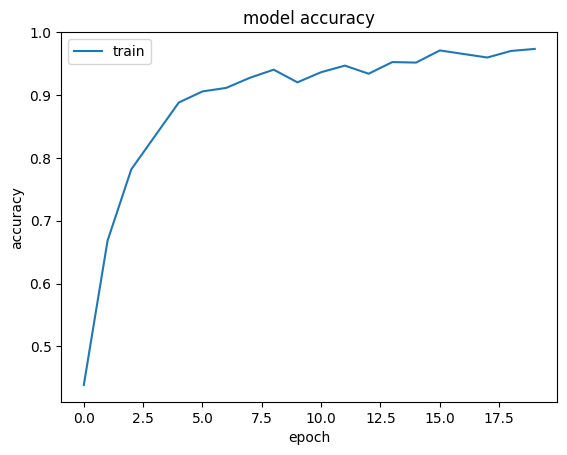

In [17]:
import matplotlib.pyplot as plt


def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    #plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


plot_hist(hist)

In [18]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

13/13 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.4670 - loss: 3.4071
Loss = 2.9489941596984863
Test Accuracy = 0.495169073343277


Input image shape: (1, 260, 260, 3)


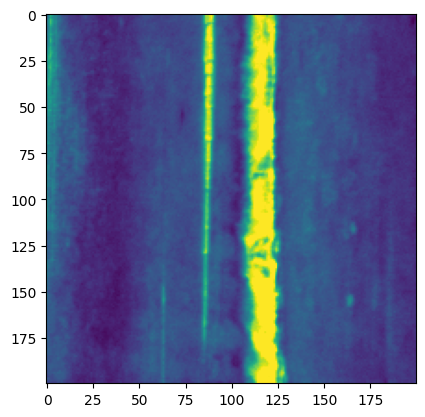

In [21]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input


img_path = '/content/Sc_119.bmp'

#img = image.load_img(img_path, target_size=(224, 224))
#x = img.img_to_array(img)

img = cv2.imread(img_path)
img = cv2.resize(img, (260, 260))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)

In [22]:
preds=model.predict(x)
preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array([[0., 0., 1., 0., 0., 0.]], dtype=float32)